In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data preprocessing
df=pd.read_csv('C:/Users/nadab/Downloads/titanic-passengers.csv',sep=';')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
#get the number of missing values on each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#delete the missing values
df.dropna(axis=0,how='any',thresh=None,inplace=True)

In [8]:
#verify the number of missing values on each column
df.isnull().sum().sum()

0

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.00,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.00,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C


In [10]:
df['Survived'].values.sum()

'NoNoNoYesYesNoYesNoYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesNoNoNoYesNoYesYesYesNoYesNoYesYesNoYesYesYesNoYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesNoNoNoYesNoNoNoYesNoYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesNoNoYesNoYesNoNoYesYesNoYesNoNoYesYesYesNoNo'

In [11]:
#transform categorical values to numerical with label encoder function
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
df['Name']=encoder.fit_transform(df['Name'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['Ticket']=encoder.fit_transform(df['Ticket'])
df['Fare']=encoder.fit_transform(df['Fare'])
df['Cabin']=encoder.fit_transform(df['Cabin'])
df['Embarked']=encoder.fit_transform(df['Embarked'])


df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,0,3,117,1,25.0,0,0,78,2,127,2
4,672,0,1,51,1,31.0,1,0,92,42,33,2
16,378,0,1,181,1,27.0,0,2,18,87,70,0
19,225,1,1,92,1,38.0,1,0,62,72,78,2
26,588,1,1,68,1,60.0,1,1,50,65,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,1,2,16,0,4.0,2,1,67,33,130,2
863,858,1,1,50,1,51.0,0,0,16,17,107,2
865,196,1,1,106,0,58.0,0,0,101,82,37,0
875,463,0,1,71,1,47.0,0,0,6,32,121,2


In [12]:
#Visualization phase

<AxesSubplot:title={'center':'histogram of ages'}, xlabel='age', ylabel='Frequency'>

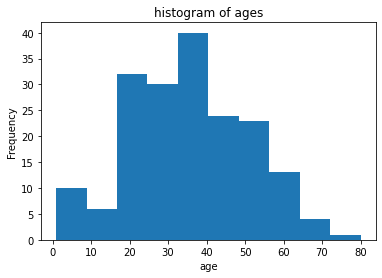

In [13]:
plt.title("histogram of ages")
plt.xlabel("age")
df['Age'].plot.hist()

In [14]:
# We can visualize that people that have the age of 20 to 40 have the highest frequency


Text(0, 0.5, 'distribution')

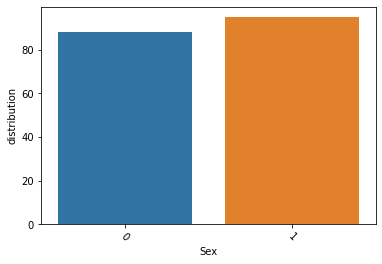

In [17]:
# also we can visualize the gender
sns.countplot(x='Sex', data=df)
plt.xticks(rotation=-45)
plt.ylabel("distribution")

In [19]:
# Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.
df[["Sex", "Age"]].groupby(["Sex"], as_index=True).mean()

,Age
Sex,
0,32.676136
1,38.451789


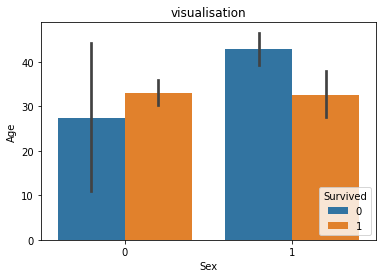

In [20]:
plt.title('visualisation')
sns.barplot(data=df, x='Sex',y='Age',hue='Survived')
plt.show()

C:\Users\nadab\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


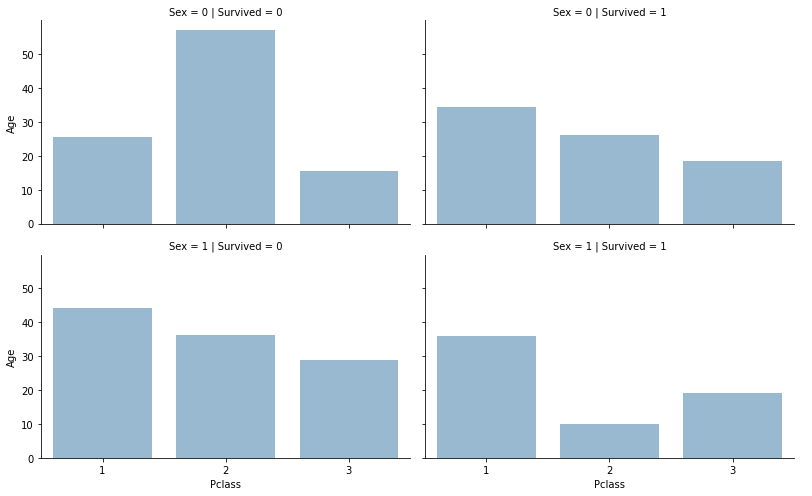

In [27]:
# Pick two other features and study their impact on the survival of the individuals.
grid = sns.FacetGrid(df, row="Sex", col="Survived", height=3.5, aspect=1.6)
grid.map(sns.barplot, "Pclass", 'Age', alpha=.5, ci=None)
grid.add_legend()




In [29]:
# Females that had : 45 for the 1st class, 38 for the 2nd one and 30 for the 3rd one didn't survived. 
#Females that had : 38 for the 1st class, 10 for the 2nd one and 20 for the 3rd one survived.
    
# Males that had : 26 for the 1st class, 55 for the 2nd one and 15 for the 3rd one didn't survived. 
#Females that had : 33 for the 1st class, 25 for the 2nd one and 19 for the 3rd one survived.

In [35]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }
    )

In [36]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.148495,-0.089136,-0.032934,-0.025205,0.030933,-0.083488,-0.051454,-0.015699,-0.010828,-0.086957,0.040037
Survived,0.148495,1.000000,-0.034542,-0.149619,-0.532418,-0.254085,0.106346,0.023582,0.022768,0.173008,-0.010664,-0.100943
Pclass,-0.089136,-0.034542,1.000000,0.179390,-0.046181,-0.306514,-0.103592,0.047496,0.256387,-0.530366,0.479785,0.236697
Name,-0.032934,-0.149619,0.179390,1.000000,0.009110,0.054818,-0.146854,0.014983,0.030484,-0.083679,0.164046,-0.028063
Sex,-0.025205,-0.532418,-0.046181,0.009110,1.000000,0.184969,-0.104291,-0.089581,-0.068017,-0.224269,-0.044766,0.063291
Age,0.030933,-0.254085,-0.306514,0.054818,0.184969,1.000000,-0.156162,-0.271271,-0.018898,-0.058470,-0.138566,-0.087312
SibSp,-0.083488,0.106346,-0.103592,-0.146854,-0.104291,-0.156162,1.000000,0.255346,-0.031351,0.400921,0.042520,0.038416
Parch,-0.051454,0.023582,0.047496,0.014983,-0.089581,-0.271271,0.255346,1.000000,-0.037910,0.358800,-0.029150,0.081796
Ticket,-0.015699,0.022768,0.256387,0.030484,-0.068017,-0.018898,-0.031351,-0.037910,1.000000,0.042404,0.114915,-0.248696
Fare,-0.010828,0.173008,-0.530366,-0.083679,-0.224269,-0.058470,0.400921,0.358800,0.042404,1.000000,-0.308524,-0.297404


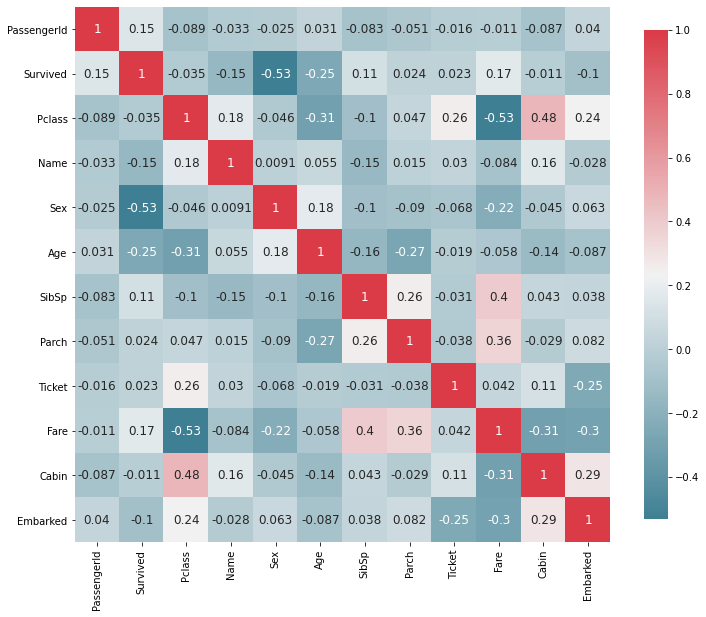

In [37]:
plot_correlation_map(df)

In [38]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.670886
2,0.800000
3,0.500000


In [41]:
new = df.drop(["PassengerId","SibSp","Parch","Ticket",], axis=1)

In [42]:
new

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
1,0,3,117,1,25.0,2,127,2
4,0,1,51,1,31.0,42,33,2
16,0,1,181,1,27.0,87,70,0
19,1,1,92,1,38.0,72,78,2
26,1,1,68,1,60.0,65,24,0
...,...,...,...,...,...,...,...,...
862,1,2,16,0,4.0,33,130,2
863,1,1,50,1,51.0,17,107,2
865,1,1,106,0,58.0,82,37,0
875,0,1,71,1,47.0,32,121,2


In [53]:
df['Title'] = df['Name']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,76,0,3,117,1,25.0,0,0,78,2,127,2,117
4,672,0,1,51,1,31.0,1,0,92,42,33,2,51
16,378,0,1,181,1,27.0,0,2,18,87,70,0,181
19,225,1,1,92,1,38.0,1,0,62,72,78,2,92
26,588,1,1,68,1,60.0,1,1,50,65,24,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,1,2,16,0,4.0,2,1,67,33,130,2,16
863,858,1,1,50,1,51.0,0,0,16,17,107,2,50
865,196,1,1,106,0,58.0,0,0,101,82,37,0,106
875,463,0,1,71,1,47.0,0,0,6,32,121,2,71


C:\Users\nadab\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


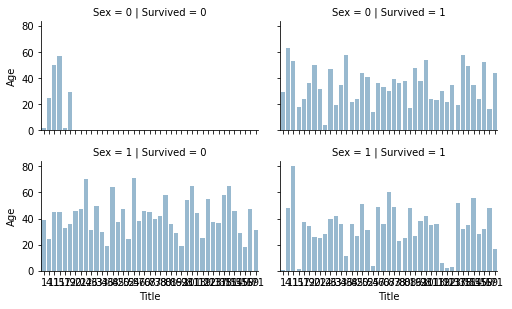

In [54]:
grid = sns.FacetGrid(df, row="Sex", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Title", 'Age', alpha=.5, ci=None)
grid.add_legend()

In [57]:
dict = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master" }

<AxesSubplot:xlabel='FamilySize'>

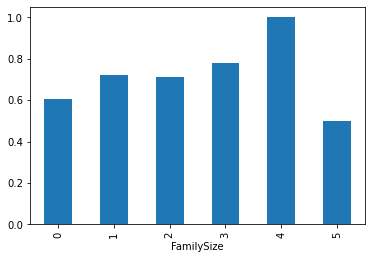

In [64]:
df["FamilySize"] = df["Parch"] + df["SibSp"]
df['Survived'].groupby(df['FamilySize']).mean().plot(kind='bar')